# Notebook 2 para generar csv de evaluacion

 ## **Hackaton RIIAA 2021 Reto 1**  
 Mejora de calidad de la imagen y clasificación  
 **Equipo:** Pista latente ML  
 **Integrantes:**  
       - Andrea Berenice Ek Hobak  
       - Gabriela Marali Mundo Cortes  
       - Mario Xavier Canche Uc  
       - Myrna Citlali Castillo Silva  
       - Ramon Sidonio Aparicio Garcia  

## Montamos carpeta en Drive

In [1]:
# Montamos el Drive al Notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Verificamos el directorio en el que nos encontramos
!pwd
!ls

/content
drive  sample_data


In [3]:
# Cambiamos de directorio al Drive
import os
os.chdir("drive/MyDrive/Hackaton2021/codigo/Entregables/Reto1")
!ls

ExtractFeatures.py			 output
Genera_Entregable_Reto1_FaceRecog.ipynb  __pycache__
Genera_Entregable_Reto1.ipynb


## Instalamos las librerias

In [4]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 20 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=5a6dae0a4197123b216f846761cd76223e3891023ace467117ff3e0f1786dd34
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


## Cargamos las librerias

In [5]:
# Cargamos las librerias
import PIL.Image
from os import listdir
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import face_recognition # reconocimiento facial


## Cargamos las rutas de las imagenes a procesar

In [6]:
# Rutas de las imagenes
path_dir = '../../../Datos - Hackathon JusticIA/Evaluacion/Reto1'

archivos = listdir(path_dir)

In [7]:
archivos

['AGN_DFS_C.240_Sanchez_Fuerte_Maria_Marcela_pg-000.jpg',
 'AGN_DFS_C.160_Murillo_de_Ramirez_Juventina_Martha_pg-002.jpg',
 'AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-084.jpg',
 'AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-082.jpg',
 'AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-326.jpg',
 'AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-096.jpg',
 'AGN_DFS_C.189_Padilla_Rivera_Rebeca_pg-001.jpg',
 'AGN_DFS_C.184_Tecla_Parra_Violeta_pg-014.jpg',
 'AGN_DFS_C.160_Murillo_de_Ramirez_Juventina_Martha_pg-005.jpg',
 'AGN_DFS_C.151_Morales_Lopez_Delia_pg-025.jpg',
 'AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-093.jpg',
 'AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-049.jpg',
 'AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-126.jpg',
 'AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-103.jpg',
 'AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-002.jpg',
 'Ficheros_ACNR_militantes_Olea_Castaneyra_Rafel_Olea_Castaneyra_Rafael,_ACNR-19-.JPG',
 'Ficheros_Detenidos_Desaparecidos_Morales_Lopez_Delia_Morales_Lopez_Delia-23-.JPG',

## Encontramos rostros en la imagen

In [8]:
# Creamos el csv de salida
archivo_out2 = "output/Evaluacion_Reto1.csv"

AGN_DFS_C.240_Sanchez_Fuerte_Maria_Marcela_pg-000.jpg
AGN_DFS_C.160_Murillo_de_Ramirez_Juventina_Martha_pg-002.jpg
AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-084.jpg
AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-082.jpg


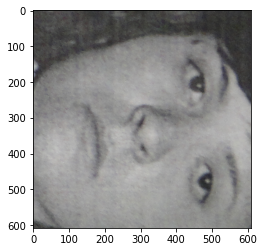

AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-326.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-096.jpg
AGN_DFS_C.189_Padilla_Rivera_Rebeca_pg-001.jpg
AGN_DFS_C.184_Tecla_Parra_Violeta_pg-014.jpg
AGN_DFS_C.160_Murillo_de_Ramirez_Juventina_Martha_pg-005.jpg
AGN_DFS_C.151_Morales_Lopez_Delia_pg-025.jpg
AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-093.jpg
AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-049.jpg


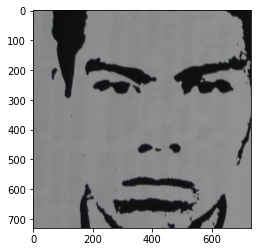

AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-126.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-103.jpg
AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-002.jpg
Ficheros_ACNR_militantes_Olea_Castaneyra_Rafel_Olea_Castaneyra_Rafael,_ACNR-19-.JPG
Ficheros_Detenidos_Desaparecidos_Morales_Lopez_Delia_Morales_Lopez_Delia-23-.JPG
Ficheros_UAG_76-11-16_a_77-03-19_UAG,_fichas-113-.JPG
Ficheros_UAG_73-10-29_a_73-12-07_UAG,_fichas-134-.JPG
Ficheros_Brigada_Campesina_de_Ajusticiamiento_BCA_Brigada_Campesina_de_Ajusticiamiento-79-.JPG
Ficheros_Detenidos_Desaparecidos_Perez_Lopez_Martha_Perez_Lopez_Martha-21-.JPG
Ficheros_FAR,_concentrado_general_FAR,_concentrado_general-157-.JPG
Ficheros_PPUA_Fichas_PPUA,_Fichas-98-.JPG
Ficheros_Represores_Martinez_Adame_Arturo_Martinez_Adame_Arturo-31-.JPG
Ficheros_Union_Campesina_Independiente,_fichas_UCI,_fichas-2-.JPG


In [10]:
# Iteramos cada imagen
for name in archivos:
    print(name)

    # Cargamos la imagen
    image = face_recognition.load_image_file( path_dir + "/" + name )

    # localizamos los posibles rostros
    face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=1, model="cnn") # (top, right, bottom, left)

    # visualizamos los resultados
    for face_loc in face_locations:
        face = image[face_loc[0]:face_loc[2],face_loc[3]:face_loc[1]]

        df = pd.DataFrame([[name, face.shape[1], face.shape[0], "Lines", face_loc[3], face_loc[0], face_loc[1], face_loc[2]]])
        df.to_csv(archivo_out2, index=False, header=False, mode='a')

        plt.imshow(face)
        plt.show()
